# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Import Libraries</p>

In [1]:
import numpy as np
import pandas as pd
import cv2

from sklearn.utils import shuffle
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

import warnings

from IPython.display import display

warnings.simplefilter("ignore")

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Load data</p>

In [2]:
df = pd.read_csv("../aquarium-dataset/train/_annotations.csv")
df = shuffle(df)
df.head()

filename  width  height  \
3042  IMG_2393_jpeg_jpg.rf.51a3d165da3aac4466f89c834...    768    1024   
3280  IMG_2504_jpeg_jpg.rf.6319bf044a6c11112e69a100f...    768    1024   
673   IMG_8591_MOV-0_jpg.rf.950e816e96ad35460046e240...    576    1024   
2785  IMG_8378_jpg.rf.406b5fbdf5f05598549ed90bab244a...   1024     768   
1929  IMG_8551_MOV-4_jpg.rf.f3784ce90069a27a41d01dbc...    576    1024   

          class  xmin  ymin  xmax  ymax  
3042       fish   213   448   523   661  
3280       fish   176   301   242   377  
673   jellyfish    44   305    94   349  
2785       fish   451   246   585   388  
1929       fish   538    89   575   189

<div style="border-radius:10px; border:#f79a05 solid; padding: 15px; background-color: #f5d77f; font-size:100%; text-align:left">
    
 * This dataset is mostly a practice and training aspect for the subject of YOLO. The data is labeled with 5 classes.
 * classic_id labels: 'car', 'truck', 'pedestrian', 'bicyclist', 'light'

In [3]:
df.columns

Index(['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax'], dtype='object')

In [4]:
classes = df["class"].unique()
print(classes)

['fish' 'jellyfish' 'shark' 'starfish' 'penguin' 'puffin' 'stingray']


In [5]:
# labels = { 1:'car', 2:'truck', 3:'person', 4:'bicycle', 5:'traffic light'}

# Map df['class'].unique() to a dictionary of integers
labels = {(v + 1): k for v, k in enumerate(df["class"].unique())}
labels

{1: 'fish',
 2: 'jellyfish',
 3: 'shark',
 4: 'starfish',
 5: 'penguin',
 6: 'puffin',
 7: 'stingray'}

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Show some labeled images</p>

In [6]:
# Get path images and boxes (x,y) for each class
boxes = {}
images = {}

base_path = "../aquarium-dataset/train/"

for class_id in classes:
    first_row = df[df["class"] == class_id].iloc[0]

    images[class_id] = cv2.imread(base_path + first_row["filename"])
    boxes[class_id] = [
        first_row["xmin"],
        first_row["xmax"],
        first_row["ymin"],
        first_row["ymax"],
    ]

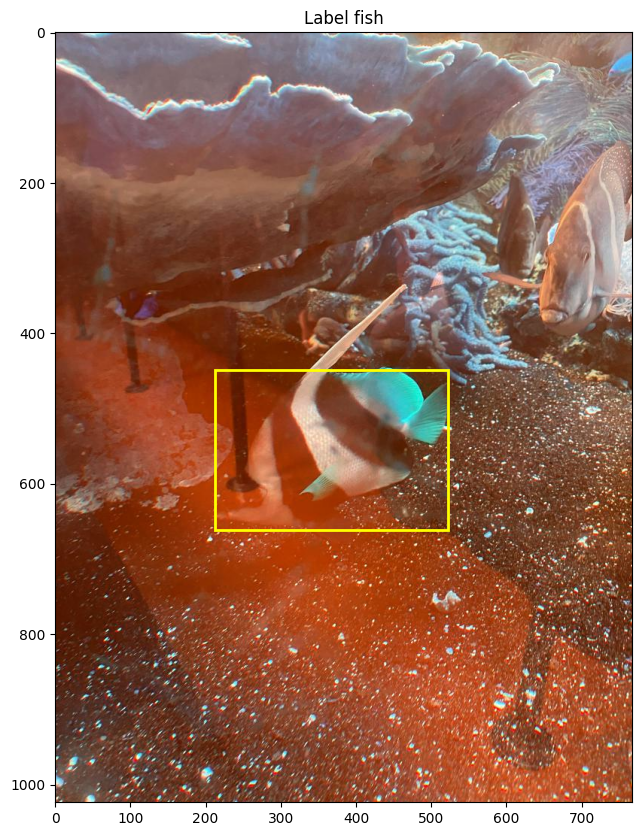

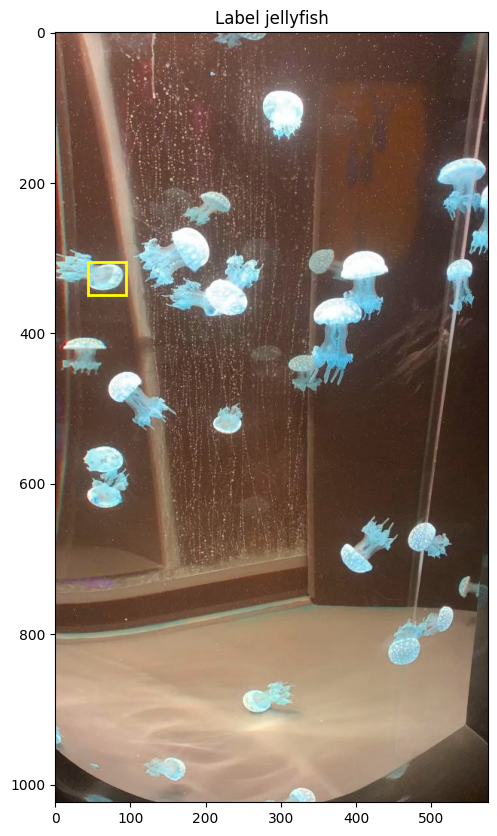

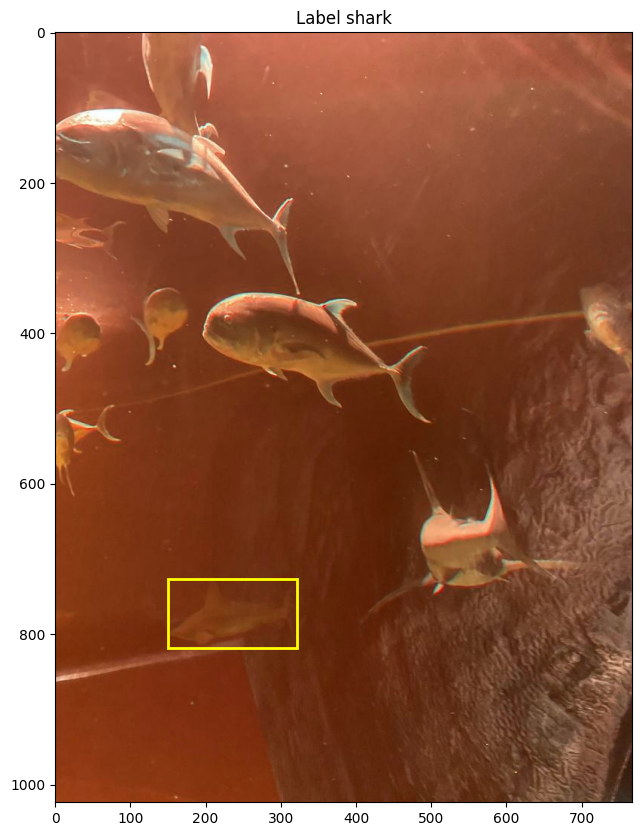

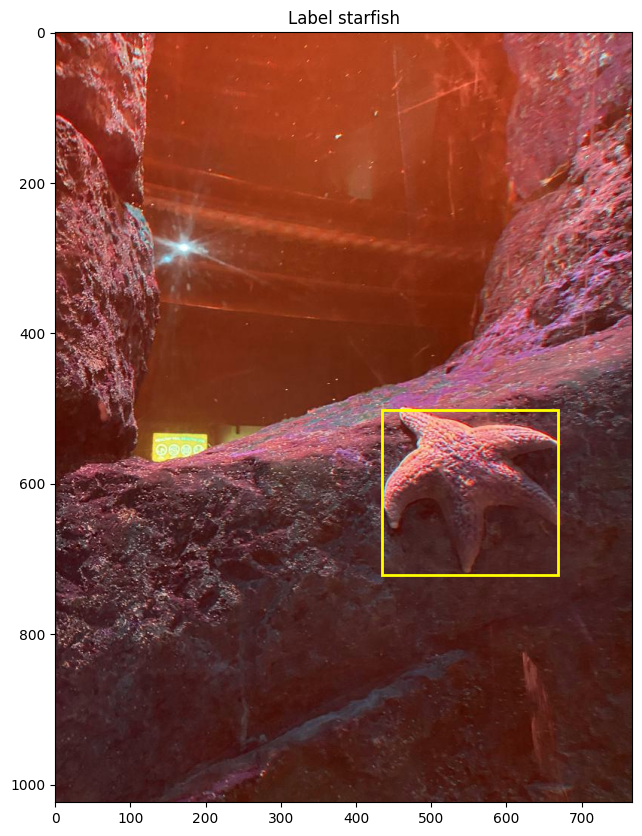

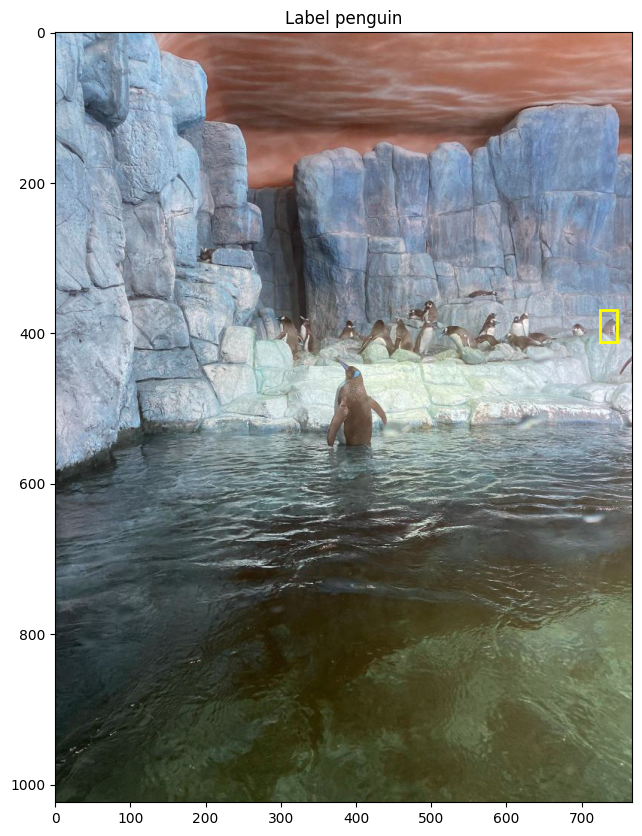

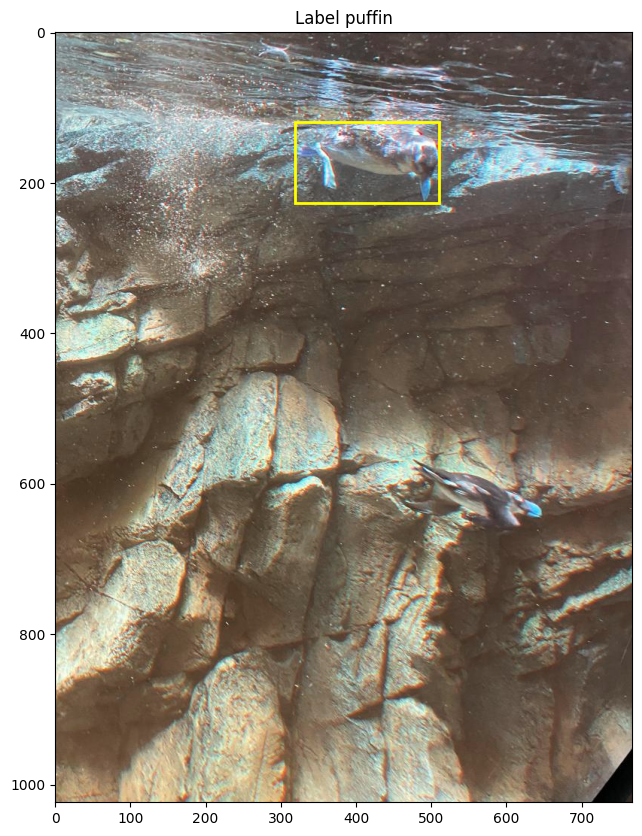

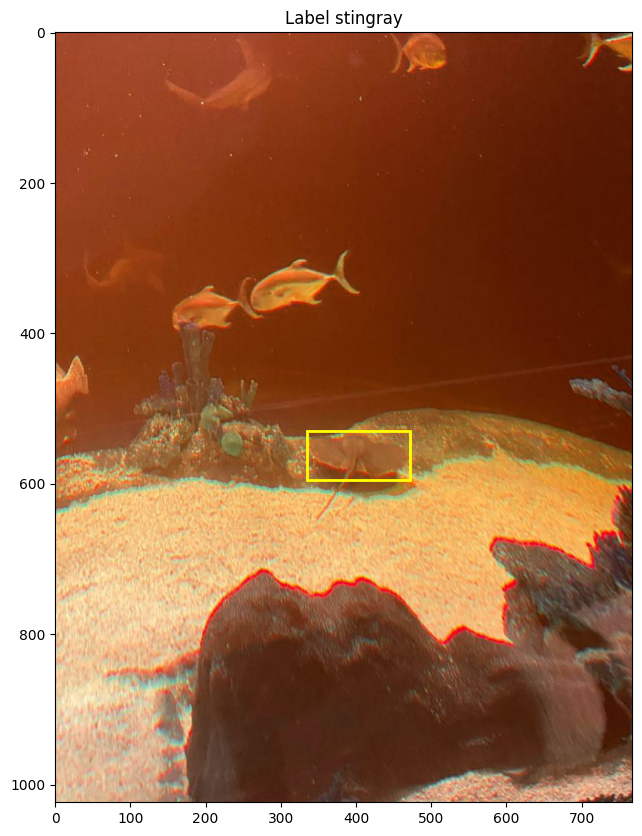

In [7]:
for n, i in enumerate(classes):

    xmin, xmax, ymin, ymax = boxes[i][0], boxes[i][1], boxes[i][2], boxes[i][3]

    plt.figure(figsize=(8, 10))
    plt.title("Label " + labels[n+1])
    plt.imshow(images[i])
    plt.gca().add_patch(
        plt.Rectangle(
            (xmin, ymin),
            xmax - xmin,
            ymax - ymin,
            color="yellow",
            fill=False,
            linewidth=2,
        )
    )

    plt.show()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#9c7606; font-size:140%; text-align:left;padding: 10px; border-bottom: 2px solid #f79a05"> Model</p>

In [8]:
!pip install -qU ultralytics

In [9]:
from ultralytics import YOLO
import PIL
from PIL import Image
from IPython.display import display
import os
import pathlib

In [10]:
model = YOLO("yolov8m.pt")

In [11]:
results = model.predict(
    source="../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg",
    save=True,
    conf=0.2,
    iou=0.5,
)


image 1/1 /Users/odai/cs5567-final-project/part-b1/../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg: 640x480 1 bird, 217.8ms
Speed: 2.8ms preprocess, 217.8ms inference, 427.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/odai/vascular-herbarium-yolo/runs/detect/predict2


In [12]:
result = results[0]
box = result.boxes[0]

In [13]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs

In [14]:
cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type:", class_id)
print("Coordinates:", cords)
print("Probability:", conf)

Object type: 14.0
Coordinates: [149.6294403076172, 482.26727294921875, 540.8052978515625, 726.4465942382812]
Probability: 0.957122802734375


In [15]:
for box in result.boxes:
    class_id = result.names[box.cls[0].item()]
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")

Object type: bird
Coordinates: [150, 482, 541, 726]
Probability: 0.96
---


In [20]:
results1 = model.predict(
    # source="../aquarium-dataset/test/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg",
    # source="../aquarium-dataset/test/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg",
    source="../aquarium-dataset/test/IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg",
    save=True,
    conf=0.2,
    iou=0.5,
)

Results = results1[0]


image 1/1 /Users/odai/cs5567-final-project/part-b1/../aquarium-dataset/test/IMG_2387_jpeg_jpg.rf.09b38bacfab0922a3a6b66480f01b719.jpg: 640x480 1 bird, 547.3ms
Speed: 3.3ms preprocess, 547.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /Users/odai/vascular-herbarium-yolo/runs/detect/predict2


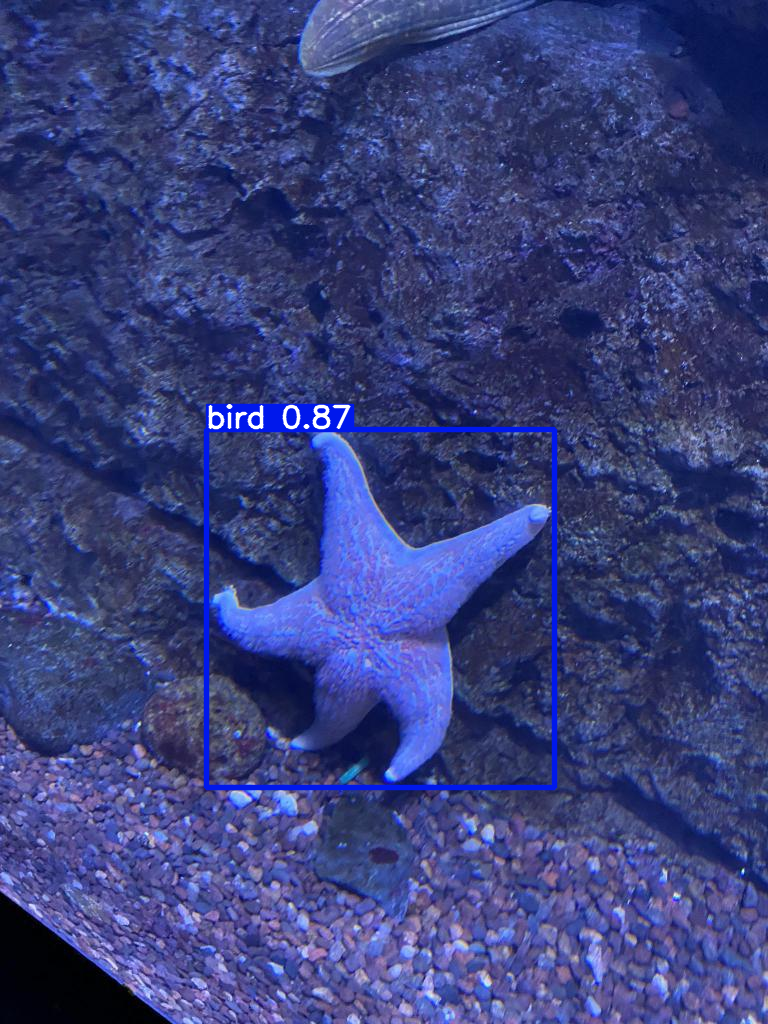

In [21]:
# Plotting results
plot = results1[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))